# Data Preprocessing

In [1]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data into a dataframe
df = pd.read_csv("fer2013.csv")

In [3]:
#analyze the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


No handles with labels found to put in legend.


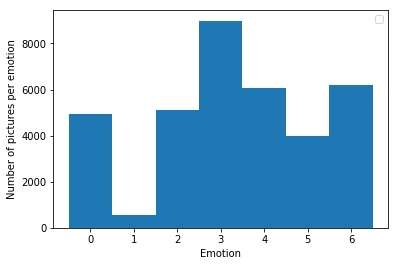

In [5]:
#plot the distribution of emotions
plt.hist(df['emotion'], bins=range(0,8), align='left')
plt.xlabel("Emotion")
plt.ylabel("Number of pictures per emotion")
plt.legend()
plt.show()

In [26]:
#data preprocessing for all images
#transfrom the strings into arrays of int values
X = df['pixels'].apply(np.core.defchararray.split) #split the string by whitespace and save as list
X = X.apply(np.asarray).values #transform list into numpy array
X = [x.astype(int) for x in X] #transform the string values into integers

In [27]:
#transform output into numpy array
Y = df['emotion'].values

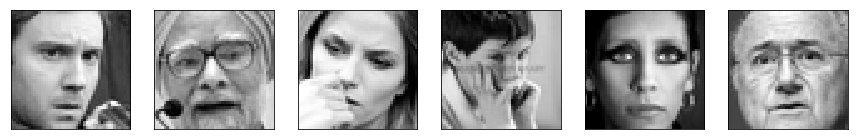

In [28]:
#draw the first 6 images
fig = plt.figure(figsize=(15, 15))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(48, 48), cmap='gray')

In [29]:
#split the data into the training and testing dataset while keeping the distribution
#do I need data scaling

# Multilayer Perceptron

In [33]:
#using keras for the MLP
from keras.models import Sequential
from keras.layers.core import Activation, Dense

In [35]:
#example of a very simple model
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# X has shape (num_rows, num_cols), where the training data are stored
# as row vectors
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

# y must have an output vector for each input vector
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Create the Sequential model
model = Sequential()

# 1st Layer - Add an input layer of 32 nodes with the same input shape as
# the training samples in X
model.add(Dense(32, input_dim=X.shape[1]))

# Add a softmax activation layer
model.add(Activation('softmax'))

# 2nd Layer - Add a fully connected output layer
model.add(Dense(1))

# Add a sigmoid activation layer
model.add(Activation('sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.summary()
model.fit(X, y, nb_epoch=1000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


/home/petruschka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ValueError: You are passing a target array of shape (4, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.